In [1]:
# imports
import numpy as np
import pandas as pd

# modelling
from sklearn.datasets import load_digits
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist

# Tree Visualization
import matplotlib.pyplot as plt
import seaborn as sn

Dataset split: 60000 train rows 60000 test rows
Dataset split: 10000 train rows 10000 test rows


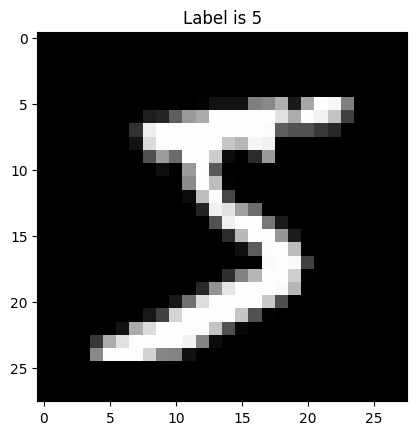

In [2]:
# Initialize
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# digits = load_digits()
print(f"Dataset split: {len(x_train)} train rows",
          f"{len(y_train)} test rows")
print(f"Dataset split: {len(x_test)} train rows",
          f"{len(y_test)} test rows")

point = np.array(x_train[0], dtype='uint8')
point = point.reshape((28, 28))

plt.title('Label is {label}'.format(label=y_train[0]))
plt.imshow(point, cmap='gray')
plt.show()

In [3]:
# normalize data
x_train = x_train.astype(np.float32) / 255
x_test = x_test.astype(np.float32) / 255

nsamples_train, nx_train, ny_train = x_train.shape
nsamples_test, nx_test, ny_test = x_test.shape

x_train = x_train.reshape((nsamples_train, nx_train * ny_train))
x_test = x_test.reshape((nsamples_test, nx_test * ny_test))

In [4]:
# Add outliers
df = pd.DataFrame()
print("Training set")
print(x_train.shape)
print(y_train.shape)

print("Test set")
print(x_test.shape)
print(y_test.shape)

Training set
(60000, 784)
(60000,)
Test set
(10000, 784)
(10000,)


In [10]:
# prepare model
n_estimators = 1000
if_contamination = 'auto'

model = IsolationForest(
        n_estimators=n_estimators, contamination=if_contamination, random_state=42, max_samples='auto')

model.fit(x_train)
df['labels'] = y_test
df['scores'] = model.decision_function(x_test)
df['anomalies'] = model.predict(x_test)
df['score_samples'] = model.score_samples(x_test)
df.head(10)

,labels,scores,anomalies,score_samples
0,7,0.071999,1,-0.428001
1,2,-0.004578,-1,-0.504578
2,1,0.116353,1,-0.383647
3,0,0.031473,1,-0.468527
4,4,0.063747,1,-0.436253
5,1,0.112869,1,-0.387131
6,4,0.059201,1,-0.440799
7,9,0.062330,1,-0.437670
8,5,0.010568,1,-0.489432
9,9,0.041135,1,-0.458865


In [24]:
# Count how many anomalies
anomalies = df.loc[df['anomalies'] == -1]
anomaly_index = list(anomalies.index)
total_outliers = len(df.loc[df['scores'] < 0])

threshold = np.quantile(df['score_samples'], 0.05)
print(anomaly_index)
print(anomalies)

[1, 18, 25, 33, 35, 51, 54, 69, 71, 72, 106, 126, 147, 151, 172, 183, 188, 200, 201, 222, 246, 259, 287, 296, 297, 305, 311, 318, 319, 338, 352, 353, 360, 372, 380, 390, 402, 405, 406, 407, 412, 421, 437, 440, 449, 461, 462, 475, 493, 503, 513, 514, 524, 527, 535, 549, 556, 559, 561, 581, 602, 608, 611, 612, 625, 642, 648, 654, 655, 656, 665, 671, 677, 701, 704, 717, 719, 720, 721, 732, 736, 737, 742, 744, 751, 762, 763, 766, 782, 787, 792, 796, 799, 804, 810, 817, 823, 845, 860, 864, 871, 876, 877, 878, 894, 896, 903, 904, 905, 923, 932, 937, 945, 972, 985, 991, 995, 997, 998, 1003, 1009, 1017, 1028, 1047, 1049, 1060, 1061, 1065, 1069, 1070, 1084, 1101, 1102, 1109, 1128, 1147, 1162, 1170, 1174, 1191, 1203, 1218, 1220, 1223, 1253, 1263, 1271, 1272, 1291, 1319, 1325, 1332, 1337, 1348, 1352, 1362, 1377, 1379, 1381, 1386, 1388, 1390, 1391, 1408, 1419, 1422, 1427, 1444, 1450, 1457, 1458, 1463, 1466, 1487, 1488, 1499, 1525, 1526, 1529, 1536, 1545, 1567, 1569, 1574, 1589, 1601, 1609, 1610, 1

In [25]:
# accuracy
print(threshold)
total_outliers = np.array(df['score_samples'])
total_outliers = len(total_outliers[total_outliers < threshold])
print("Accuracy")
print(list(df['anomalies']).count(-1))
print(total_outliers)
percentage = 100 * list(df['anomalies']).count(-1) / (total_outliers)
print(percentage)

-0.5304876420623348
Accuracy
1467
500
293.4


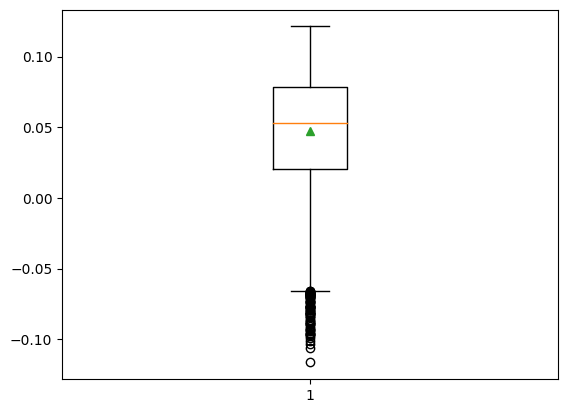

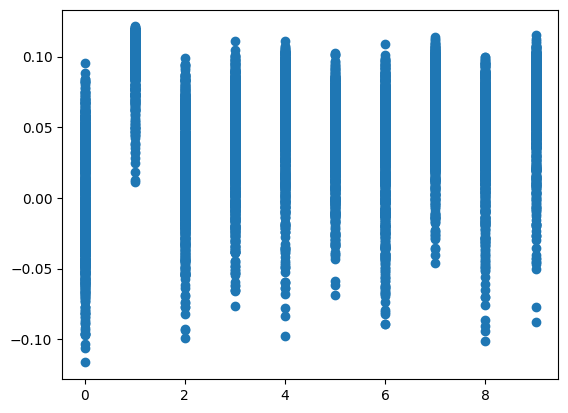

In [26]:
plt.boxplot(df['scores'], showmeans=True, showfliers=True)
plt.show()

plt.scatter(df['labels'], df['scores'])
plt.show()